<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-25/La2_3_bc_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1120, done.
remote: Counting objects: 100% (410/410), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 1120 (delta 259), reused 274 (delta 175), pack-reused 710
Receiving objects: 100% (1120/1120), 65.28 MiB | 22.04 MiB/s, done.
Resolving deltas: 100% (628/628), done.
Updating files: 100% (150/150), done.


'/content'

### 24-07-25 La2/3-b gating

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 1%

Trying to tap off the gating electrode



In [3]:
%cd "/content/gator/data/07-25/"

/content/gator/data/07-25


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0725_102454.csv')
df = pd.read_csv('defbuffer1_0725_102454.csv')


Fill Mode,1



In [6]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.008821,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999958,Volt DC,1,T,2W,F,F,0.000000
1,0.008821,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999958,Volt DC,1,T,2W,F,F,0.069404
2,0.008822,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999957,Volt DC,1,T,2W,F,F,0.138750
3,0.008822,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999958,Volt DC,1,T,2W,F,F,0.208103
4,0.008822,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999958,Volt DC,1,T,2W,F,F,0.277439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12760,0.008950,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999950,Volt DC,1,T,2W,F,F,885.522324
12761,0.008950,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999951,Volt DC,1,T,2W,F,F,885.591692
12762,0.008950,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999951,Volt DC,1,T,2W,F,F,885.661033
12763,0.008950,Amp DC,0.01,5.5,F,F,F,F,F,F,...,F,Main,0.999952,Volt DC,1,T,2W,F,F,885.730395


In [21]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e15

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

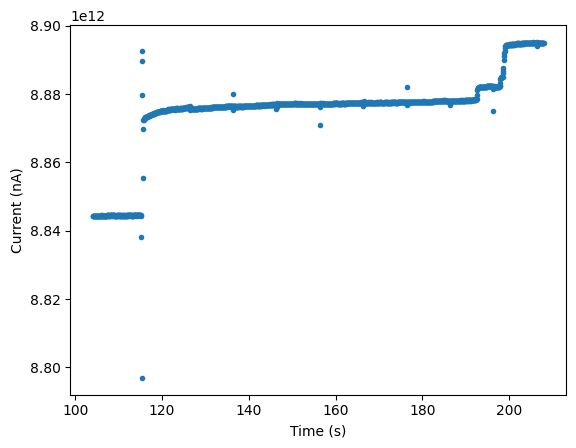

In [22]:
cut1 = 1500
cut2 = 3000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

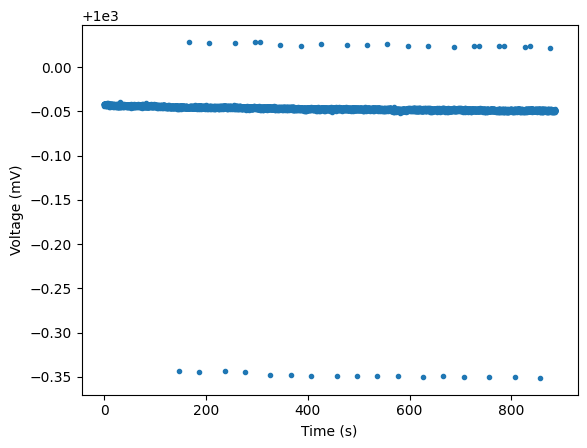

In [16]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

In [24]:
prep_csv('defbuffer1_0725_103403.csv')
df1 = pd.read_csv('defbuffer1_0725_103403.csv')


0.01186534017324,Amp DC,.1,5.5,F,F,F,F,F,F,Front,F,Main,0.9999805092812,Volt DC,1,T,2W,F,F,0.069391840



In [25]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e15

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

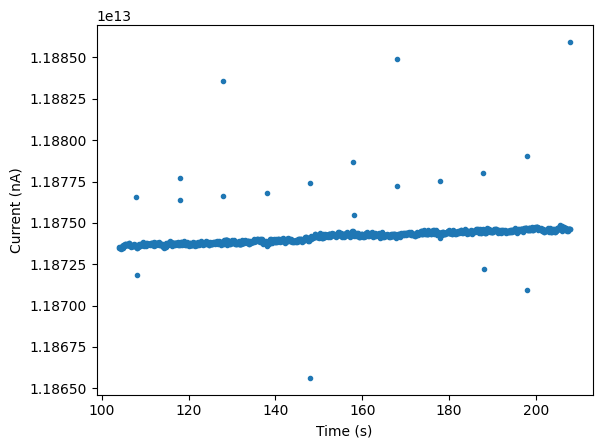

In [28]:
cut1 = 1500
cut2 = 3000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

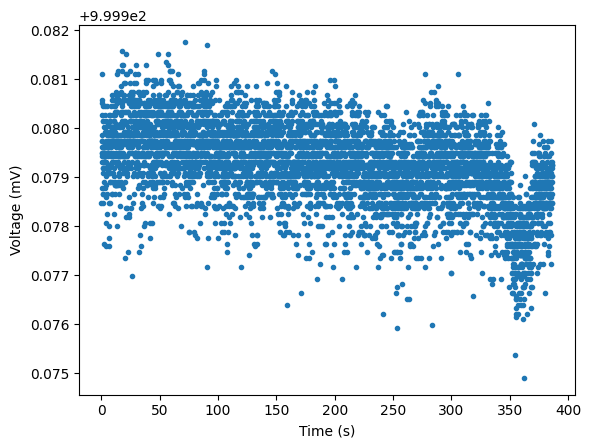

In [27]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()